In [1]:
#Import necessary functions
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
df = pd.read_csv('data/Final_Motor_Vehicle_Collisions_QuBr_2018_2023-Model.csv')
df.head()

,CRASH DATE TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,CONTRIBUTING CATEGORY V1,SEASON,TIME OF DAY,IS RUSH HOUR
0,2018-01-01 00:00:00,BROOKLYN,11234,40.628770,-73.91825,1,0,Failure to Yield Right-of-Way,3820945,Sedan,Moving Violation,Winter,Late Night,False
1,2018-01-01 00:05:00,BROOKLYN,11211,40.718460,-73.95281,0,0,Failure to Yield Right-of-Way,3818641,Sedan,Moving Violation,Winter,Late Night,False
2,2018-01-01 00:15:00,BROOKLYN,11236,40.645176,-73.90622,0,0,Unsafe Speed,3824618,Station Wagon/Sport Utility Vehicle,Moving Violation,Winter,Late Night,False
3,2018-01-01 00:30:00,BROOKLYN,11211,40.716805,-73.95460,0,0,Driver Inattention/Distraction,3818640,Taxi,Driver Inattention,Winter,Late Night,False
4,2018-01-01 01:10:00,QUEENS,11385,40.695526,-73.90395,0,0,Traffic Control Disregarded,3819354,Sedan,Moving Violation,Winter,Late Night,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42108 entries, 0 to 42107
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE TIME                42108 non-null  object 
 1   BOROUGH                        42108 non-null  object 
 2   ZIP CODE                       42108 non-null  int64  
 3   LATITUDE                       42108 non-null  float64
 4   LONGITUDE                      42108 non-null  float64
 5   NUMBER OF PERSONS INJURED      42108 non-null  int64  
 6   NUMBER OF PERSONS KILLED       42108 non-null  int64  
 7   CONTRIBUTING FACTOR VEHICLE 1  42108 non-null  object 
 8   COLLISION_ID                   42108 non-null  int64  
 9   VEHICLE TYPE CODE 1            42108 non-null  object 
 10  CONTRIBUTING CATEGORY V1       42108 non-null  object 
 11  SEASON                         42108 non-null  object 
 12  TIME OF DAY                    42108 non-null 

## CHOROPLETH

In [4]:
#Create dataframe counting number of accidents per zipcode
count_test = df.groupby('ZIP CODE').count()['COLLISION_ID'].sort_values(ascending=False)

#reset index
count_test = count_test.reset_index(name='TOTAL # ACCIDENTS')

#count_test.head(10)
count_test

,ZIP CODE,TOTAL # ACCIDENTS
0,11207,5805
1,11101,4618
2,11234,4428
3,11385,4135
4,11236,4038
5,11211,3951
6,11368,3900
7,11206,3838
8,11201,3700
9,11373,3695


In [14]:
print(count_test['TOTAL # ACCIDENTS'].sum())
print()
print(count_test['TOTAL # ACCIDENTS'].describe())

42108

count      10.00000
mean     4210.80000
std       634.21917
min      3695.00000
25%      3853.50000
50%      3994.50000
75%      4354.75000
max      5805.00000
Name: TOTAL # ACCIDENTS, dtype: float64


In [15]:
#Create dataframe counting number of accidents per zipcode
cause_count_by_zipcode = df.groupby('ZIP CODE').count()['COLLISION_ID']

#reset index
cause_count_by_zipcode = cause_count_by_zipcode.reset_index(name='COUNT')

cause_count_by_zipcode

,ZIP CODE,COUNT
0,11101,4618
1,11201,3700
2,11206,3838
3,11207,5805
4,11211,3951
5,11234,4428
6,11236,4038
7,11368,3900
8,11373,3695
9,11385,4135


In [16]:
import geopandas as gpd

zipcodes = gpd.read_file('data/ZIP_CODE_040114/ZIP_CODE_040114.shp')
zipcodes

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,0.0,0.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,0,Far Rockaway,11052.0,3.497516e+06,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,0,Brooklyn,28481.0,1.777221e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42108 entries, 0 to 42107
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CRASH DATE TIME                42108 non-null  datetime64[ns]
 1   BOROUGH                        42108 non-null  object        
 2   ZIP CODE                       42108 non-null  int64         
 3   LATITUDE                       42108 non-null  float64       
 4   LONGITUDE                      42108 non-null  float64       
 5   NUMBER OF PERSONS INJURED      42108 non-null  int64         
 6   NUMBER OF PERSONS KILLED       42108 non-null  int64         
 7   CONTRIBUTING FACTOR VEHICLE 1  42108 non-null  object        
 8   COLLISION_ID                   42108 non-null  int64         
 9   VEHICLE TYPE CODE 1            42108 non-null  object        
 10  CONTRIBUTING CATEGORY V1       42108 non-null  object        
 11  SEASON         

In [18]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ZIPCODE     263 non-null    object  
 1   BLDGZIP     263 non-null    object  
 2   PO_NAME     263 non-null    object  
 3   POPULATION  263 non-null    float64 
 4   AREA        263 non-null    float64 
 5   STATE       263 non-null    object  
 6   COUNTY      263 non-null    object  
 7   ST_FIPS     263 non-null    object  
 8   CTY_FIPS    263 non-null    object  
 9   URL         263 non-null    object  
 10  SHAPE_AREA  263 non-null    float64 
 11  SHAPE_LEN   263 non-null    float64 
 12  geometry    263 non-null    geometry
dtypes: float64(4), geometry(1), object(8)
memory usage: 26.8+ KB


In [19]:
zipcodes['ZIPCODE'] = zipcodes['ZIPCODE'].astype('int64')

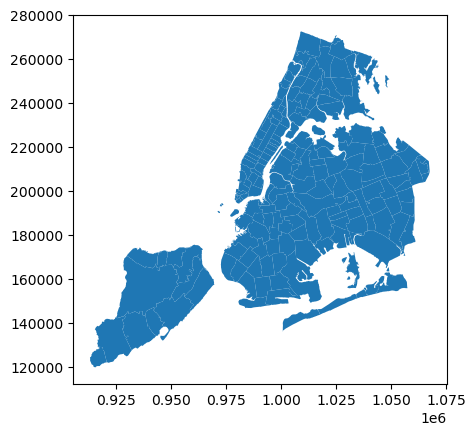

In [20]:
zipcodes.plot();

## CHOROPLETH

In [21]:
# Merge with your dataframe on the 'Zip code' column
merged2 = zipcodes.merge(cause_count_by_zipcode, left_on='ZIPCODE', right_on='ZIP CODE')
merged2


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ZIP CODE,COUNT
0,11368,0,Corona,109069.0,7.248966e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1022299.623 218703.908, 1022285.600 ...",11368,3900
1,11101,0,Long Island City,26254.0,7.896209e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((996450.660 210544.144, 996513.807 21...",11101,4618
2,11385,0,Ridgewood,98436.0,1.247863e+08,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1007499.885 199242.452, 1007573.769 ...",11385,4135
3,11206,0,Brooklyn,83575.0,4.070072e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1002987.943 197218.048, 1003016.011 ...",11206,3838
4,11201,0,Brooklyn,53041.0,4.109489e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((990158.980 196291.403, 990132.710 19...",11201,3700
5,11207,0,Brooklyn,93556.0,7.396626e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1010961.260 190844.518, 1010984.556 ...",11207,5805
6,11236,0,Brooklyn,94480.0,9.637399e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1012306.415 178457.610, 1012350.198 ...",11236,4038
7,11234,0,Brooklyn,85853.0,2.062010e+08,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1002458.956 170567.601, 1002500.000 ...",11234,4428
8,11211,0,Brooklyn,60861.0,4.047088e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1004708.889 202095.457, 1004867.276 ...",11211,3951
9,11373,0,Elmhurst,101282.0,4.265486e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1015508.539 204353.966, 1015508.502 ...",11373,3695


<AxesSubplot:>

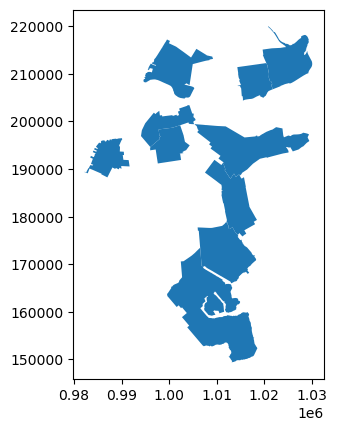

In [22]:
merged2.plot()


In [22]:
merged2['ZIPCODE'].unique()

array([11368, 11101, 11385, 11206, 11201, 11207, 11236, 11234, 11211,
       11373])

In [23]:
#Filter for collisions that occured within the top 10 zip codes
top10zips_mv = [11207, 11234, 11101, 11385, 11236, 11211, 11206, 11368, 11201, 11208 ]

top10_choro = merged2.loc[merged2['ZIPCODE'].isin(top10zips_mv)]
top10_choro
#Filter for top two causes
#df = df.loc[df['CONTRIBUTING CATEGORY V1'].isin(['Moving Violation', 'Driver Inattention'])]
#df

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry,ZIP CODE,COUNT
0,11368,0,Corona,109069.0,7.248966e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1022299.623 218703.908, 1022285.600 ...",11368,3900
1,11101,0,Long Island City,26254.0,7.896209e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((996450.660 210544.144, 996513.807 21...",11101,4618
2,11385,0,Ridgewood,98436.0,1.247863e+08,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1007499.885 199242.452, 1007573.769 ...",11385,4135
3,11206,0,Brooklyn,83575.0,4.070072e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1002987.943 197218.048, 1003016.011 ...",11206,3838
4,11201,0,Brooklyn,53041.0,4.109489e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((990158.980 196291.403, 990132.710 19...",11201,3700
5,11207,0,Brooklyn,93556.0,7.396626e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1010961.260 190844.518, 1010984.556 ...",11207,5805
6,11236,0,Brooklyn,94480.0,9.637399e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1012306.415 178457.610, 1012350.198 ...",11236,4038
7,11234,0,Brooklyn,85853.0,2.062010e+08,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1002458.956 170567.601, 1002500.000 ...",11234,4428
8,11211,0,Brooklyn,60861.0,4.047088e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1004708.889 202095.457, 1004867.276 ...",11211,3951


KeyError: 61

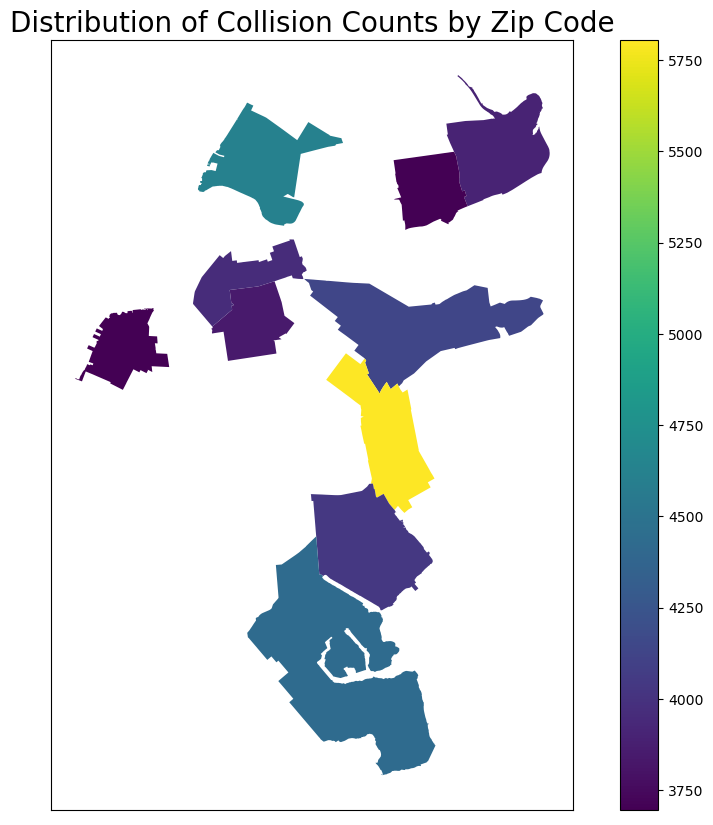

In [24]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw=dict(aspect='equal'))
merged2.plot(column='COUNT', k=5, legend=True, ax=ax)
ax.set_title('Distribution of Collision Counts by Zip Code', fontsize = 20);

# Remove x and y axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Outline Brooklyn and Queens with a red line
bk_poly11234 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][61]
bk_poly11207 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][45]
bk_poly11236 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][59]
bk_poly11211 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][103]#
bk_poly11206 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][38]#
bk_poly11208 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][44]#
bk_poly11201 = merged2[merged2['COUNTY'] == 'Kings']['geometry'][42]#


qn_poly11101 = merged2[merged2['COUNTY'] == 'Queens']['geometry'][28]
qn_poly11385 = merged2[merged2['COUNTY'] == 'Queens']['geometry'][37]
qn_poly11368 = merged2[merged2['COUNTY'] == 'Queens']['geometry'][25]#


ax.plot(bk_poly11207.exterior.xy[0], bk_poly11207.exterior.xy[1], color='red', linewidth=3)
ax.plot(bk_poly11234.exterior.xy[0], bk_poly11234.exterior.xy[1], color='red', linewidth=3)
ax.plot(bk_poly11236.exterior.xy[0], bk_poly11236.exterior.xy[1], color='red', linewidth=3)

ax.plot(bk_poly11211.exterior.xy[0], bk_poly11211.exterior.xy[1], color='black', linewidth=3)
ax.plot(bk_poly11206.exterior.xy[0], bk_poly11206.exterior.xy[1], color='black', linewidth=3)
ax.plot(bk_poly11208.exterior.xy[0], bk_poly11208.exterior.xy[1], color='black', linewidth=3)
ax.plot(bk_poly11201.exterior.xy[0], bk_poly11201.exterior.xy[1], color='black', linewidth=3)

ax.plot(qn_poly11101.exterior.xy[0], qn_poly11101.exterior.xy[1], color='red', linewidth=3)
ax.plot(qn_poly11385.exterior.xy[0], qn_poly11385.exterior.xy[1], color='red', linewidth=3)
ax.plot(qn_poly11368.exterior.xy[0], qn_poly11368.exterior.xy[1], color='black', linewidth=3);

In [ ]:
qn_poly = merged2[merged2['COUNTY'] == 'Queens']['geometry']
qn_poly.head(60)

In [ ]:
bk_poly = merged2[merged2['COUNTY'] == 'Kings']['geometry']
bk_poly